In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import sys
sys.path.append("../src")
from utils import get_summary_stat,get_mean_value

In [2]:
#elementary numpy operations
array1 = np.array([1,2,3,4,5])
array2 = np.array([2,4,6,8,10])
array3 = array1 + array2
array4 = array1*array2
array5 = np.dot(array1,array2)
print(array3)
print(array4)
print(array5)

[ 3  6  9 12 15]
[ 2  8 18 32 50]
110


In [3]:
#compare for loop and vectorization
%timeit 2*array1
%timeit [i*2 for i in array1]

265 ns ± 6.61 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
372 ns ± 3.99 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [4]:
#read starter_data from path
csv_path = "/Users/zhengtaosun/Documents/bootcamp_Zhengtao_Sun/homework/stage3_hw/data/raw/starter_data.csv"
path1 = Path(csv_path)
df = pd.read_csv(path1)
df

,category,value,date
0,A,10,2025-08-01
1,B,15,2025-08-02
2,A,12,2025-08-03
3,B,18,2025-08-04
4,C,25,2025-08-05
5,C,30,2025-08-06
6,A,11,2025-08-07
7,B,14,2025-08-08
8,C,28,2025-08-09
9,A,13,2025-08-10


Summary Statistics

In [5]:
#save summary statistic to data/processed folder
path = "/Users/zhengtaosun/Documents/bootcamp_Zhengtao_Sun/homework/stage3_hw/data/processed"
df_summary = df.describe()
df_summary.to_csv(f"{path}/summary.csv")

In [6]:
df.groupby("category").median(numeric_only=True).reset_index()

,category,value
0,A,11.5
1,B,15.0
2,C,28.0


In [7]:
df.groupby("category").mean(numeric_only=True).reset_index()

,category,value
0,A,11.500000
1,B,15.666667
2,C,27.666667


In [8]:
#creat sub folders in Data folder
folder = ["processed","raw"]
base = Path("/Users/zhengtaosun/Documents/bootcamp_Zhengtao_Sun/homework/stage3_hw/data")
for f in folder:
    (base / f).mkdir(parents=True,exist_ok=True)

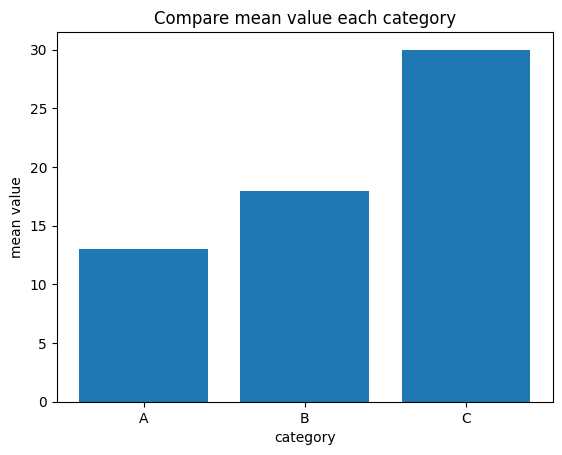

In [9]:
#create basic plot for starter data
df_mean = df.groupby("category").mean(numeric_only=True).reset_index()
plt.bar(df['category'],df["value"])
plt.xlabel("category")
plt.ylabel("mean value")
plt.title("Compare mean value each category")
plt.savefig(f"{path}/mean_value.png")
plt.show()

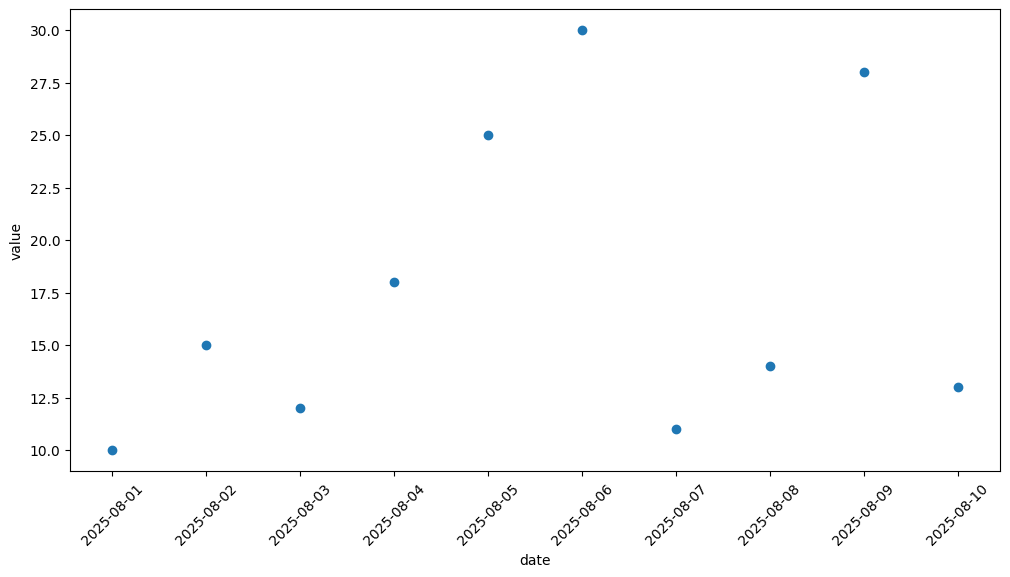

In [10]:
#visualize value for different date
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["value"])
plt.xlabel("date")
plt.ylabel("value")
plt.xticks(rotation = 45)
plt.savefig(f"{path}/value_distribution")
plt.show()

In [11]:
#apply function from utils
get_summary_stat(df)

,value
count,10.000000
mean,17.600000
std,7.381659
min,10.000000
25%,12.250000
50%,14.500000
75%,23.250000
max,30.000000


In [12]:
get_mean_value(df)

np.float64(17.6)